In [413]:
import torch
import torchvision
import numpy as np
from torch.autograd import Variable
# from torch.utils.data import Dataset, DataLoader

In [454]:
n_epochs = 10
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [415]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.EMNIST('/files/', split='byclass',train=True, download=True,
                              
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.EMNIST('/files/',split='byclass', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                                
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)
print(type(train_loader))
t1 = train_loader
t2 = test_loader
print(len(train_loader))
print(np.shape(train_loader))
print(len(t1.dataset))


<class 'torch.utils.data.dataloader.DataLoader'>
10906
()
697932


In [416]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [417]:
# for batch_idx, (data, target) in enumerate(train_loader):
#     d = data
#     t = target
# print(type(data))
# print(type(target))
# print(len(d))    

In [418]:
dataiter = iter(train_loader)
images, train_labels = dataiter.next()

dataiter = iter(test_loader)
images_t, test_labels = dataiter.next()

print(np.shape(train_labels))
print(np.shape(images))
print(len(train_loader))

torch.Size([64])
torch.Size([64, 1, 28, 28])
10906


In [419]:
###### example
# grocery = ['bread', 'milk', 'butter']
# enumerateGrocery = enumerate(grocery)

# print(type(enumerateGrocery))

# # converting to list
# print(list(enumerateGrocery))

# # changing the default counter
# enumerateGrocery = enumerate(grocery, 10)
# print(list(enumerateGrocery))

In [420]:
# ###### example
# s = ['1','2','3']
# r = 2

# for data, target in enumerate(s,r):
#     print(data,target)
    

In [421]:
print(type(train_loader))
# train_labels = train_labels.long()
# test_labels = test_labels.long()
# train_labels.type()
print(train_labels[0:10])
print(test_labels[0:10])
print(np.shape(train_labels))


<class 'torch.utils.data.dataloader.DataLoader'>
tensor([ 3, 49, 40, 39, 53, 53, 39,  9,  0, 53])
tensor([ 4, 30, 53,  9, 29,  6,  6, 49, 31, 23])
torch.Size([64])


In [422]:
# Convert data to numpy arrays and normalize images to the interval [0, 1]

train_loader = next(iter(train_loader))[0].numpy() / 255.0
test_loader = next(iter(test_loader))[0].numpy() / 255.0
print(type(train_loader))
print(len(train_loader))         #len changes here from 10906 to 64

<class 'numpy.ndarray'>
64


In [423]:
print(train_loader.shape)
print(type(train_loader))
# print(train_loader[0])

(64, 1, 28, 28)
<class 'numpy.ndarray'>


In [424]:

#Reshaping all images into 28*28 for pre-processing
train_loader =train_loader.reshape(train_loader.shape[0], 28, 28)
test_loader = test_loader.reshape(test_loader.shape[0], 28, 28)
print(np.shape(train_loader))
print(np.size(test_loader))
print(type(train_loader))

(64, 28, 28)
784000
<class 'numpy.ndarray'>


tensor(49)


<function matplotlib.pyplot.show(*args, **kw)>

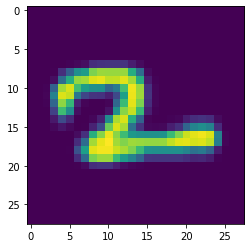

In [425]:
import matplotlib.pyplot as plt
print(train_labels[1])
plt.imshow(train_loader[1])
plt.show

In [426]:
# a = np.array([1,2,3,4])
# s = []
# print(type(a))
# i=0
# for t in a:
#     s.append(t-1)
# print(s)
# print(type(s))

tensor(49)
Process Complete: Rotated and reversed test and train images!


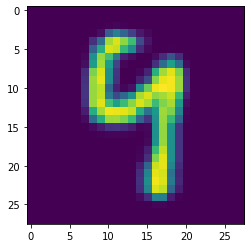

In [427]:
#Now we perform Image preprocessing. We reverse and rotate all train and test images
#for train data
s = []
for t in train_loader:
    s.append(np.transpose(t))
np.asarray(s)
train_loader = s

#checking
print(train_labels[1])
plt.imshow(train_loader[1])
plt.show

s=[]
#for test data  
for t in test_loader:
    s.append(np.transpose(t))
np.asarray(s)
test_loader = s
#checking
# plt.imshow(test_loader[0])
# plt.show

print('Process Complete: Rotated and reversed test and train images!')

In [428]:
# converting labels into numpy array

print(type(train_loader))
print(type(train_labels))
print(np.shape(train_labels))

train_labels = train_labels.numpy()
test_labels = test_labels.numpy()
print(type(train_labels))

print(np.shape(train_loader))      # len = 64


<class 'list'>
<class 'torch.Tensor'>
torch.Size([64])
<class 'numpy.ndarray'>
(64, 28, 28)


In [429]:
# Converting back to dataloader form for giving it as input to model

# tensor_tr = torch.Tensor(train_loader) # transform to torch tensor
# tensor_te = torch.Tensor(test_loader)


# tr_dataset = torch.utils.data.TensorDataset(tensor_tr) # create your datset
# train_loader = torch.utils.data.DataLoader(tr_dataset) # create your dataloader

# te_dataset = torch.utils.data.TensorDataset(tensor_te) # create your datset
# test_loader = torch.utils.data.DataLoader(te_dataset) # create your dataloader
print(len(train_loader))

train_loader = np.asarray(train_loader)
test_loader = np.asarray(test_loader)
print(len(train_loader))

print(np.shape(train_loader))
train_loader =train_loader.reshape(train_loader.shape[0],1, 28, 28)
test_loader =test_loader.reshape(test_loader.shape[0],1, 28, 28)
print(np.shape(train_loader))
print(len(train_loader))

train_data = []
for i in range(len(train_loader)):
    train_data.append([train_loader[i], train_labels[i]])

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=100)

test_data = []
for i in range(len(test_loader)):
    test_data.append([test_loader[i], test_labels[i]])

test_loader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=100)


print(type(train_loader))
print(type(test_loader))
print(np.shape(train_loader))
print(len(train_loader))

64
64
(64, 28, 28)
(64, 1, 28, 28)
64
<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader.DataLoader'>
()
1


In [430]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples,test_labels)

In [431]:
example_data.shape

torch.Size([100, 1, 28, 28])

In [432]:
# import matplotlib.pyplot as plt

# fig = plt.figure()
# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.tight_layout()
#   plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
#   plt.title("Ground Truth: {}".format(example_targets[i]))
#   plt.xticks([])
#   plt.yticks([])


In [433]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [434]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(32*4*4, 128)
        self.fc2 = nn.Linear(128, 62)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         print(x.shape)
        x = x.view(-1, 32*4*4)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [435]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [455]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(t1.dataset) for i in range(n_epochs + 1)]

In [456]:
def train(epoch):
    network.train()
    for batch_idx in range(len(t1)):
        if batch_idx % log_interval == 0:
            for (data, target) in (train_loader):
        #         print(len(train_loader))       # which is 1.. so how will batch_idx change??????
        #         print(len(t1))          # correct to use coz it comes out to 10906 (see above too)
#                 print(len(train_loader.dataset))
                optimizer.zero_grad()
                output = network(data)
                loss = F.nll_loss(output, target)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())
                train_counter.append((batch_idx*64) + ((epoch-1)*len(t1.dataset)))
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                 epoch, batch_idx * len(data), len(t1.dataset),
                   100. * batch_idx / len(t1), loss.item()))
            
#       torch.save(network.state_dict(), 'results/model.pth')
#       torch.save(optimizer.state_dict(), 'results/optimizer.pth')

In [457]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in (test_loader):
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
            test_loss /= len(t2.dataset)
            test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(t2.dataset),
    100. * correct / len(t2.dataset)))

In [458]:
print(type(test_labels))
print(type(test_loader))

<class 'numpy.ndarray'>
<class 'torch.utils.data.dataloader.DataLoader'>


In [459]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

C:\Users\Akshata\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 0.0043, Accuracy: 38/116323 (0%)

Train Epoch: 1 [0/697932 (0%)]	Loss: 3.196530
Train Epoch: 1 [640/697932 (0%)]	Loss: 3.183414
Train Epoch: 1 [1280/697932 (0%)]	Loss: 3.181930
Train Epoch: 1 [1920/697932 (0%)]	Loss: 3.179841
Train Epoch: 1 [2560/697932 (0%)]	Loss: 3.148721
Train Epoch: 1 [3200/697932 (0%)]	Loss: 3.134105
Train Epoch: 1 [3840/697932 (1%)]	Loss: 3.159969
Train Epoch: 1 [4480/697932 (1%)]	Loss: 3.182072
Train Epoch: 1 [5120/697932 (1%)]	Loss: 3.237235
Train Epoch: 1 [5760/697932 (1%)]	Loss: 3.204405
Train Epoch: 1 [6400/697932 (1%)]	Loss: 3.146964
Train Epoch: 1 [7040/697932 (1%)]	Loss: 3.184255
Train Epoch: 1 [7680/697932 (1%)]	Loss: 3.202422
Train Epoch: 1 [8320/697932 (1%)]	Loss: 3.178823
Train Epoch: 1 [8960/697932 (1%)]	Loss: 3.179480
Train Epoch: 1 [9600/697932 (1%)]	Loss: 3.187767
Train Epoch: 1 [10240/697932 (1%)]	Loss: 3.161274
Train Epoch: 1 [10880/697932 (2%)]	Loss: 3.196213
Train Epoch: 1 [11520/697932 (2%)]	Loss: 3.184565
Train Epoch: 1

Train Epoch: 1 [203520/697932 (29%)]	Loss: 3.148177
Train Epoch: 1 [204160/697932 (29%)]	Loss: 3.200797
Train Epoch: 1 [204800/697932 (29%)]	Loss: 3.182302
Train Epoch: 1 [205440/697932 (29%)]	Loss: 3.119110
Train Epoch: 1 [206080/697932 (30%)]	Loss: 3.179600
Train Epoch: 1 [206720/697932 (30%)]	Loss: 3.174635
Train Epoch: 1 [207360/697932 (30%)]	Loss: 3.190008
Train Epoch: 1 [208000/697932 (30%)]	Loss: 3.169673
Train Epoch: 1 [208640/697932 (30%)]	Loss: 3.177439
Train Epoch: 1 [209280/697932 (30%)]	Loss: 3.134780
Train Epoch: 1 [209920/697932 (30%)]	Loss: 3.184019
Train Epoch: 1 [210560/697932 (30%)]	Loss: 3.145991
Train Epoch: 1 [211200/697932 (30%)]	Loss: 3.165009
Train Epoch: 1 [211840/697932 (30%)]	Loss: 3.182403
Train Epoch: 1 [212480/697932 (30%)]	Loss: 3.182500
Train Epoch: 1 [213120/697932 (31%)]	Loss: 3.166100
Train Epoch: 1 [213760/697932 (31%)]	Loss: 3.171268
Train Epoch: 1 [214400/697932 (31%)]	Loss: 3.180191
Train Epoch: 1 [215040/697932 (31%)]	Loss: 3.164236
Train Epoch:

Train Epoch: 1 [404480/697932 (58%)]	Loss: 3.190885
Train Epoch: 1 [405120/697932 (58%)]	Loss: 3.189243
Train Epoch: 1 [405760/697932 (58%)]	Loss: 3.193747
Train Epoch: 1 [406400/697932 (58%)]	Loss: 3.205098
Train Epoch: 1 [407040/697932 (58%)]	Loss: 3.177249
Train Epoch: 1 [407680/697932 (58%)]	Loss: 3.196660
Train Epoch: 1 [408320/697932 (58%)]	Loss: 3.186465
Train Epoch: 1 [408960/697932 (59%)]	Loss: 3.160031
Train Epoch: 1 [409600/697932 (59%)]	Loss: 3.167909
Train Epoch: 1 [410240/697932 (59%)]	Loss: 3.157070
Train Epoch: 1 [410880/697932 (59%)]	Loss: 3.172404
Train Epoch: 1 [411520/697932 (59%)]	Loss: 3.137408
Train Epoch: 1 [412160/697932 (59%)]	Loss: 3.176448
Train Epoch: 1 [412800/697932 (59%)]	Loss: 3.194457
Train Epoch: 1 [413440/697932 (59%)]	Loss: 3.197342
Train Epoch: 1 [414080/697932 (59%)]	Loss: 3.195680
Train Epoch: 1 [414720/697932 (59%)]	Loss: 3.179683
Train Epoch: 1 [415360/697932 (60%)]	Loss: 3.152589
Train Epoch: 1 [416000/697932 (60%)]	Loss: 3.130476
Train Epoch:

Train Epoch: 1 [605440/697932 (87%)]	Loss: 3.158267
Train Epoch: 1 [606080/697932 (87%)]	Loss: 3.147986
Train Epoch: 1 [606720/697932 (87%)]	Loss: 3.159916
Train Epoch: 1 [607360/697932 (87%)]	Loss: 3.166767
Train Epoch: 1 [608000/697932 (87%)]	Loss: 3.162641
Train Epoch: 1 [608640/697932 (87%)]	Loss: 3.169606
Train Epoch: 1 [609280/697932 (87%)]	Loss: 3.216661
Train Epoch: 1 [609920/697932 (87%)]	Loss: 3.170066
Train Epoch: 1 [610560/697932 (87%)]	Loss: 3.196182
Train Epoch: 1 [611200/697932 (88%)]	Loss: 3.192017
Train Epoch: 1 [611840/697932 (88%)]	Loss: 3.182238
Train Epoch: 1 [612480/697932 (88%)]	Loss: 3.189987
Train Epoch: 1 [613120/697932 (88%)]	Loss: 3.150673
Train Epoch: 1 [613760/697932 (88%)]	Loss: 3.163319
Train Epoch: 1 [614400/697932 (88%)]	Loss: 3.156418
Train Epoch: 1 [615040/697932 (88%)]	Loss: 3.171753
Train Epoch: 1 [615680/697932 (88%)]	Loss: 3.165099
Train Epoch: 1 [616320/697932 (88%)]	Loss: 3.212290
Train Epoch: 1 [616960/697932 (88%)]	Loss: 3.143507
Train Epoch:

Train Epoch: 2 [111360/697932 (16%)]	Loss: 3.157065
Train Epoch: 2 [112000/697932 (16%)]	Loss: 3.166143
Train Epoch: 2 [112640/697932 (16%)]	Loss: 3.200470
Train Epoch: 2 [113280/697932 (16%)]	Loss: 3.174883
Train Epoch: 2 [113920/697932 (16%)]	Loss: 3.169187
Train Epoch: 2 [114560/697932 (16%)]	Loss: 3.144397
Train Epoch: 2 [115200/697932 (17%)]	Loss: 3.169550
Train Epoch: 2 [115840/697932 (17%)]	Loss: 3.195999
Train Epoch: 2 [116480/697932 (17%)]	Loss: 3.124669
Train Epoch: 2 [117120/697932 (17%)]	Loss: 3.156953
Train Epoch: 2 [117760/697932 (17%)]	Loss: 3.183585
Train Epoch: 2 [118400/697932 (17%)]	Loss: 3.161720
Train Epoch: 2 [119040/697932 (17%)]	Loss: 3.188570
Train Epoch: 2 [119680/697932 (17%)]	Loss: 3.188340
Train Epoch: 2 [120320/697932 (17%)]	Loss: 3.204633
Train Epoch: 2 [120960/697932 (17%)]	Loss: 3.196086
Train Epoch: 2 [121600/697932 (17%)]	Loss: 3.164710
Train Epoch: 2 [122240/697932 (18%)]	Loss: 3.144659
Train Epoch: 2 [122880/697932 (18%)]	Loss: 3.185458
Train Epoch:

Train Epoch: 2 [312320/697932 (45%)]	Loss: 3.157350
Train Epoch: 2 [312960/697932 (45%)]	Loss: 3.162228
Train Epoch: 2 [313600/697932 (45%)]	Loss: 3.150485
Train Epoch: 2 [314240/697932 (45%)]	Loss: 3.190041
Train Epoch: 2 [314880/697932 (45%)]	Loss: 3.170954
Train Epoch: 2 [315520/697932 (45%)]	Loss: 3.181173
Train Epoch: 2 [316160/697932 (45%)]	Loss: 3.189748
Train Epoch: 2 [316800/697932 (45%)]	Loss: 3.160177
Train Epoch: 2 [317440/697932 (45%)]	Loss: 3.190267
Train Epoch: 2 [318080/697932 (46%)]	Loss: 3.150235
Train Epoch: 2 [318720/697932 (46%)]	Loss: 3.166656
Train Epoch: 2 [319360/697932 (46%)]	Loss: 3.181972
Train Epoch: 2 [320000/697932 (46%)]	Loss: 3.176471
Train Epoch: 2 [320640/697932 (46%)]	Loss: 3.188976
Train Epoch: 2 [321280/697932 (46%)]	Loss: 3.150952
Train Epoch: 2 [321920/697932 (46%)]	Loss: 3.157936
Train Epoch: 2 [322560/697932 (46%)]	Loss: 3.161459
Train Epoch: 2 [323200/697932 (46%)]	Loss: 3.157900
Train Epoch: 2 [323840/697932 (46%)]	Loss: 3.168734
Train Epoch:

Train Epoch: 2 [513280/697932 (74%)]	Loss: 3.155460
Train Epoch: 2 [513920/697932 (74%)]	Loss: 3.165991
Train Epoch: 2 [514560/697932 (74%)]	Loss: 3.168532
Train Epoch: 2 [515200/697932 (74%)]	Loss: 3.176906
Train Epoch: 2 [515840/697932 (74%)]	Loss: 3.140669
Train Epoch: 2 [516480/697932 (74%)]	Loss: 3.183961
Train Epoch: 2 [517120/697932 (74%)]	Loss: 3.169542
Train Epoch: 2 [517760/697932 (74%)]	Loss: 3.191928
Train Epoch: 2 [518400/697932 (74%)]	Loss: 3.171710
Train Epoch: 2 [519040/697932 (74%)]	Loss: 3.169624
Train Epoch: 2 [519680/697932 (74%)]	Loss: 3.171837
Train Epoch: 2 [520320/697932 (75%)]	Loss: 3.160015
Train Epoch: 2 [520960/697932 (75%)]	Loss: 3.184085
Train Epoch: 2 [521600/697932 (75%)]	Loss: 3.200703
Train Epoch: 2 [522240/697932 (75%)]	Loss: 3.171869
Train Epoch: 2 [522880/697932 (75%)]	Loss: 3.194216
Train Epoch: 2 [523520/697932 (75%)]	Loss: 3.197062
Train Epoch: 2 [524160/697932 (75%)]	Loss: 3.156112
Train Epoch: 2 [524800/697932 (75%)]	Loss: 3.176495
Train Epoch:

Train Epoch: 3 [16000/697932 (2%)]	Loss: 3.176080
Train Epoch: 3 [16640/697932 (2%)]	Loss: 3.183551
Train Epoch: 3 [17280/697932 (2%)]	Loss: 3.144691
Train Epoch: 3 [17920/697932 (3%)]	Loss: 3.186635
Train Epoch: 3 [18560/697932 (3%)]	Loss: 3.173613
Train Epoch: 3 [19200/697932 (3%)]	Loss: 3.198173
Train Epoch: 3 [19840/697932 (3%)]	Loss: 3.173639
Train Epoch: 3 [20480/697932 (3%)]	Loss: 3.145507
Train Epoch: 3 [21120/697932 (3%)]	Loss: 3.141220
Train Epoch: 3 [21760/697932 (3%)]	Loss: 3.162975
Train Epoch: 3 [22400/697932 (3%)]	Loss: 3.154841
Train Epoch: 3 [23040/697932 (3%)]	Loss: 3.192234
Train Epoch: 3 [23680/697932 (3%)]	Loss: 3.169644
Train Epoch: 3 [24320/697932 (3%)]	Loss: 3.145095
Train Epoch: 3 [24960/697932 (4%)]	Loss: 3.187584
Train Epoch: 3 [25600/697932 (4%)]	Loss: 3.180219
Train Epoch: 3 [26240/697932 (4%)]	Loss: 3.192141
Train Epoch: 3 [26880/697932 (4%)]	Loss: 3.163056
Train Epoch: 3 [27520/697932 (4%)]	Loss: 3.209426
Train Epoch: 3 [28160/697932 (4%)]	Loss: 3.207161


Train Epoch: 3 [219520/697932 (31%)]	Loss: 3.169384
Train Epoch: 3 [220160/697932 (32%)]	Loss: 3.146386
Train Epoch: 3 [220800/697932 (32%)]	Loss: 3.183294
Train Epoch: 3 [221440/697932 (32%)]	Loss: 3.145016
Train Epoch: 3 [222080/697932 (32%)]	Loss: 3.166521
Train Epoch: 3 [222720/697932 (32%)]	Loss: 3.157807
Train Epoch: 3 [223360/697932 (32%)]	Loss: 3.175220
Train Epoch: 3 [224000/697932 (32%)]	Loss: 3.142601
Train Epoch: 3 [224640/697932 (32%)]	Loss: 3.144443
Train Epoch: 3 [225280/697932 (32%)]	Loss: 3.191180
Train Epoch: 3 [225920/697932 (32%)]	Loss: 3.148804
Train Epoch: 3 [226560/697932 (32%)]	Loss: 3.171518
Train Epoch: 3 [227200/697932 (33%)]	Loss: 3.175808
Train Epoch: 3 [227840/697932 (33%)]	Loss: 3.165977
Train Epoch: 3 [228480/697932 (33%)]	Loss: 3.148774
Train Epoch: 3 [229120/697932 (33%)]	Loss: 3.194666
Train Epoch: 3 [229760/697932 (33%)]	Loss: 3.160662
Train Epoch: 3 [230400/697932 (33%)]	Loss: 3.154939
Train Epoch: 3 [231040/697932 (33%)]	Loss: 3.142444
Train Epoch:

Train Epoch: 3 [420480/697932 (60%)]	Loss: 3.165266
Train Epoch: 3 [421120/697932 (60%)]	Loss: 3.193018
Train Epoch: 3 [421760/697932 (60%)]	Loss: 3.176629
Train Epoch: 3 [422400/697932 (61%)]	Loss: 3.172321
Train Epoch: 3 [423040/697932 (61%)]	Loss: 3.145997
Train Epoch: 3 [423680/697932 (61%)]	Loss: 3.137609
Train Epoch: 3 [424320/697932 (61%)]	Loss: 3.145157
Train Epoch: 3 [424960/697932 (61%)]	Loss: 3.194621
Train Epoch: 3 [425600/697932 (61%)]	Loss: 3.202763
Train Epoch: 3 [426240/697932 (61%)]	Loss: 3.146434
Train Epoch: 3 [426880/697932 (61%)]	Loss: 3.170730
Train Epoch: 3 [427520/697932 (61%)]	Loss: 3.198298
Train Epoch: 3 [428160/697932 (61%)]	Loss: 3.189724
Train Epoch: 3 [428800/697932 (61%)]	Loss: 3.185110
Train Epoch: 3 [429440/697932 (62%)]	Loss: 3.143118
Train Epoch: 3 [430080/697932 (62%)]	Loss: 3.184456
Train Epoch: 3 [430720/697932 (62%)]	Loss: 3.208333
Train Epoch: 3 [431360/697932 (62%)]	Loss: 3.177222
Train Epoch: 3 [432000/697932 (62%)]	Loss: 3.174193
Train Epoch:

Train Epoch: 3 [621440/697932 (89%)]	Loss: 3.164624
Train Epoch: 3 [622080/697932 (89%)]	Loss: 3.138999
Train Epoch: 3 [622720/697932 (89%)]	Loss: 3.201707
Train Epoch: 3 [623360/697932 (89%)]	Loss: 3.149357
Train Epoch: 3 [624000/697932 (89%)]	Loss: 3.194814
Train Epoch: 3 [624640/697932 (89%)]	Loss: 3.163908
Train Epoch: 3 [625280/697932 (90%)]	Loss: 3.172203
Train Epoch: 3 [625920/697932 (90%)]	Loss: 3.173263
Train Epoch: 3 [626560/697932 (90%)]	Loss: 3.164699
Train Epoch: 3 [627200/697932 (90%)]	Loss: 3.173307
Train Epoch: 3 [627840/697932 (90%)]	Loss: 3.175707
Train Epoch: 3 [628480/697932 (90%)]	Loss: 3.163965
Train Epoch: 3 [629120/697932 (90%)]	Loss: 3.163958
Train Epoch: 3 [629760/697932 (90%)]	Loss: 3.191050
Train Epoch: 3 [630400/697932 (90%)]	Loss: 3.200509
Train Epoch: 3 [631040/697932 (90%)]	Loss: 3.155652
Train Epoch: 3 [631680/697932 (91%)]	Loss: 3.192058
Train Epoch: 3 [632320/697932 (91%)]	Loss: 3.158082
Train Epoch: 3 [632960/697932 (91%)]	Loss: 3.186592
Train Epoch:

Train Epoch: 4 [127360/697932 (18%)]	Loss: 3.190955
Train Epoch: 4 [128000/697932 (18%)]	Loss: 3.170207
Train Epoch: 4 [128640/697932 (18%)]	Loss: 3.174959
Train Epoch: 4 [129280/697932 (19%)]	Loss: 3.196658
Train Epoch: 4 [129920/697932 (19%)]	Loss: 3.185355
Train Epoch: 4 [130560/697932 (19%)]	Loss: 3.166313
Train Epoch: 4 [131200/697932 (19%)]	Loss: 3.150208
Train Epoch: 4 [131840/697932 (19%)]	Loss: 3.167816
Train Epoch: 4 [132480/697932 (19%)]	Loss: 3.188951
Train Epoch: 4 [133120/697932 (19%)]	Loss: 3.171136
Train Epoch: 4 [133760/697932 (19%)]	Loss: 3.183133
Train Epoch: 4 [134400/697932 (19%)]	Loss: 3.128621
Train Epoch: 4 [135040/697932 (19%)]	Loss: 3.163517
Train Epoch: 4 [135680/697932 (19%)]	Loss: 3.175866
Train Epoch: 4 [136320/697932 (20%)]	Loss: 3.173957
Train Epoch: 4 [136960/697932 (20%)]	Loss: 3.201047
Train Epoch: 4 [137600/697932 (20%)]	Loss: 3.162867
Train Epoch: 4 [138240/697932 (20%)]	Loss: 3.184168
Train Epoch: 4 [138880/697932 (20%)]	Loss: 3.171186
Train Epoch:

Train Epoch: 4 [328320/697932 (47%)]	Loss: 3.183603
Train Epoch: 4 [328960/697932 (47%)]	Loss: 3.175888
Train Epoch: 4 [329600/697932 (47%)]	Loss: 3.157922
Train Epoch: 4 [330240/697932 (47%)]	Loss: 3.143937
Train Epoch: 4 [330880/697932 (47%)]	Loss: 3.170660
Train Epoch: 4 [331520/697932 (47%)]	Loss: 3.179292
Train Epoch: 4 [332160/697932 (48%)]	Loss: 3.200797
Train Epoch: 4 [332800/697932 (48%)]	Loss: 3.145977
Train Epoch: 4 [333440/697932 (48%)]	Loss: 3.191776
Train Epoch: 4 [334080/697932 (48%)]	Loss: 3.175684
Train Epoch: 4 [334720/697932 (48%)]	Loss: 3.194141
Train Epoch: 4 [335360/697932 (48%)]	Loss: 3.176056
Train Epoch: 4 [336000/697932 (48%)]	Loss: 3.152941
Train Epoch: 4 [336640/697932 (48%)]	Loss: 3.176024
Train Epoch: 4 [337280/697932 (48%)]	Loss: 3.191787
Train Epoch: 4 [337920/697932 (48%)]	Loss: 3.156360
Train Epoch: 4 [338560/697932 (49%)]	Loss: 3.185055
Train Epoch: 4 [339200/697932 (49%)]	Loss: 3.165115
Train Epoch: 4 [339840/697932 (49%)]	Loss: 3.189066
Train Epoch:

Train Epoch: 4 [529280/697932 (76%)]	Loss: 3.198413
Train Epoch: 4 [529920/697932 (76%)]	Loss: 3.183088
Train Epoch: 4 [530560/697932 (76%)]	Loss: 3.157135
Train Epoch: 4 [531200/697932 (76%)]	Loss: 3.159315
Train Epoch: 4 [531840/697932 (76%)]	Loss: 3.164175
Train Epoch: 4 [532480/697932 (76%)]	Loss: 3.149601
Train Epoch: 4 [533120/697932 (76%)]	Loss: 3.167188
Train Epoch: 4 [533760/697932 (76%)]	Loss: 3.178592
Train Epoch: 4 [534400/697932 (77%)]	Loss: 3.158123
Train Epoch: 4 [535040/697932 (77%)]	Loss: 3.167181
Train Epoch: 4 [535680/697932 (77%)]	Loss: 3.161630
Train Epoch: 4 [536320/697932 (77%)]	Loss: 3.180242
Train Epoch: 4 [536960/697932 (77%)]	Loss: 3.161778
Train Epoch: 4 [537600/697932 (77%)]	Loss: 3.198126
Train Epoch: 4 [538240/697932 (77%)]	Loss: 3.160794
Train Epoch: 4 [538880/697932 (77%)]	Loss: 3.165800
Train Epoch: 4 [539520/697932 (77%)]	Loss: 3.169424
Train Epoch: 4 [540160/697932 (77%)]	Loss: 3.179105
Train Epoch: 4 [540800/697932 (77%)]	Loss: 3.158177
Train Epoch:

Train Epoch: 5 [32640/697932 (5%)]	Loss: 3.151616
Train Epoch: 5 [33280/697932 (5%)]	Loss: 3.172497
Train Epoch: 5 [33920/697932 (5%)]	Loss: 3.132146
Train Epoch: 5 [34560/697932 (5%)]	Loss: 3.151337
Train Epoch: 5 [35200/697932 (5%)]	Loss: 3.173831
Train Epoch: 5 [35840/697932 (5%)]	Loss: 3.158912
Train Epoch: 5 [36480/697932 (5%)]	Loss: 3.184581
Train Epoch: 5 [37120/697932 (5%)]	Loss: 3.188871
Train Epoch: 5 [37760/697932 (5%)]	Loss: 3.193330
Train Epoch: 5 [38400/697932 (6%)]	Loss: 3.152044
Train Epoch: 5 [39040/697932 (6%)]	Loss: 3.170386
Train Epoch: 5 [39680/697932 (6%)]	Loss: 3.166916
Train Epoch: 5 [40320/697932 (6%)]	Loss: 3.168717
Train Epoch: 5 [40960/697932 (6%)]	Loss: 3.176554
Train Epoch: 5 [41600/697932 (6%)]	Loss: 3.148865
Train Epoch: 5 [42240/697932 (6%)]	Loss: 3.160835
Train Epoch: 5 [42880/697932 (6%)]	Loss: 3.168784
Train Epoch: 5 [43520/697932 (6%)]	Loss: 3.183403
Train Epoch: 5 [44160/697932 (6%)]	Loss: 3.154083
Train Epoch: 5 [44800/697932 (6%)]	Loss: 3.163309


Train Epoch: 5 [235520/697932 (34%)]	Loss: 3.198459
Train Epoch: 5 [236160/697932 (34%)]	Loss: 3.164593
Train Epoch: 5 [236800/697932 (34%)]	Loss: 3.168103
Train Epoch: 5 [237440/697932 (34%)]	Loss: 3.160295
Train Epoch: 5 [238080/697932 (34%)]	Loss: 3.205174
Train Epoch: 5 [238720/697932 (34%)]	Loss: 3.191908
Train Epoch: 5 [239360/697932 (34%)]	Loss: 3.163018
Train Epoch: 5 [240000/697932 (34%)]	Loss: 3.194265
Train Epoch: 5 [240640/697932 (34%)]	Loss: 3.167400
Train Epoch: 5 [241280/697932 (35%)]	Loss: 3.180587
Train Epoch: 5 [241920/697932 (35%)]	Loss: 3.195534
Train Epoch: 5 [242560/697932 (35%)]	Loss: 3.152755
Train Epoch: 5 [243200/697932 (35%)]	Loss: 3.169147
Train Epoch: 5 [243840/697932 (35%)]	Loss: 3.172341
Train Epoch: 5 [244480/697932 (35%)]	Loss: 3.135632
Train Epoch: 5 [245120/697932 (35%)]	Loss: 3.153182
Train Epoch: 5 [245760/697932 (35%)]	Loss: 3.160584
Train Epoch: 5 [246400/697932 (35%)]	Loss: 3.155613
Train Epoch: 5 [247040/697932 (35%)]	Loss: 3.161963
Train Epoch:

Train Epoch: 5 [436480/697932 (63%)]	Loss: 3.159865
Train Epoch: 5 [437120/697932 (63%)]	Loss: 3.179069
Train Epoch: 5 [437760/697932 (63%)]	Loss: 3.160126
Train Epoch: 5 [438400/697932 (63%)]	Loss: 3.175601
Train Epoch: 5 [439040/697932 (63%)]	Loss: 3.156234
Train Epoch: 5 [439680/697932 (63%)]	Loss: 3.146194
Train Epoch: 5 [440320/697932 (63%)]	Loss: 3.190565
Train Epoch: 5 [440960/697932 (63%)]	Loss: 3.169559
Train Epoch: 5 [441600/697932 (63%)]	Loss: 3.161359
Train Epoch: 5 [442240/697932 (63%)]	Loss: 3.155555
Train Epoch: 5 [442880/697932 (63%)]	Loss: 3.193995
Train Epoch: 5 [443520/697932 (64%)]	Loss: 3.180029
Train Epoch: 5 [444160/697932 (64%)]	Loss: 3.183661
Train Epoch: 5 [444800/697932 (64%)]	Loss: 3.146732
Train Epoch: 5 [445440/697932 (64%)]	Loss: 3.181396
Train Epoch: 5 [446080/697932 (64%)]	Loss: 3.140406
Train Epoch: 5 [446720/697932 (64%)]	Loss: 3.175652
Train Epoch: 5 [447360/697932 (64%)]	Loss: 3.173965
Train Epoch: 5 [448000/697932 (64%)]	Loss: 3.156538
Train Epoch:

Train Epoch: 5 [637440/697932 (91%)]	Loss: 3.159111
Train Epoch: 5 [638080/697932 (91%)]	Loss: 3.189210
Train Epoch: 5 [638720/697932 (92%)]	Loss: 3.156379
Train Epoch: 5 [639360/697932 (92%)]	Loss: 3.199141
Train Epoch: 5 [640000/697932 (92%)]	Loss: 3.176257
Train Epoch: 5 [640640/697932 (92%)]	Loss: 3.166009
Train Epoch: 5 [641280/697932 (92%)]	Loss: 3.180170
Train Epoch: 5 [641920/697932 (92%)]	Loss: 3.165186
Train Epoch: 5 [642560/697932 (92%)]	Loss: 3.155585
Train Epoch: 5 [643200/697932 (92%)]	Loss: 3.182022
Train Epoch: 5 [643840/697932 (92%)]	Loss: 3.180910
Train Epoch: 5 [644480/697932 (92%)]	Loss: 3.165732
Train Epoch: 5 [645120/697932 (92%)]	Loss: 3.164456
Train Epoch: 5 [645760/697932 (93%)]	Loss: 3.187074
Train Epoch: 5 [646400/697932 (93%)]	Loss: 3.178810
Train Epoch: 5 [647040/697932 (93%)]	Loss: 3.164080
Train Epoch: 5 [647680/697932 (93%)]	Loss: 3.161879
Train Epoch: 5 [648320/697932 (93%)]	Loss: 3.159651
Train Epoch: 5 [648960/697932 (93%)]	Loss: 3.203682
Train Epoch:

Train Epoch: 6 [143360/697932 (21%)]	Loss: 3.141268
Train Epoch: 6 [144000/697932 (21%)]	Loss: 3.174965
Train Epoch: 6 [144640/697932 (21%)]	Loss: 3.169376
Train Epoch: 6 [145280/697932 (21%)]	Loss: 3.193427
Train Epoch: 6 [145920/697932 (21%)]	Loss: 3.171893
Train Epoch: 6 [146560/697932 (21%)]	Loss: 3.145022
Train Epoch: 6 [147200/697932 (21%)]	Loss: 3.172341
Train Epoch: 6 [147840/697932 (21%)]	Loss: 3.164587
Train Epoch: 6 [148480/697932 (21%)]	Loss: 3.188916
Train Epoch: 6 [149120/697932 (21%)]	Loss: 3.165345
Train Epoch: 6 [149760/697932 (21%)]	Loss: 3.164299
Train Epoch: 6 [150400/697932 (22%)]	Loss: 3.178779
Train Epoch: 6 [151040/697932 (22%)]	Loss: 3.149874
Train Epoch: 6 [151680/697932 (22%)]	Loss: 3.172269
Train Epoch: 6 [152320/697932 (22%)]	Loss: 3.176740
Train Epoch: 6 [152960/697932 (22%)]	Loss: 3.199972
Train Epoch: 6 [153600/697932 (22%)]	Loss: 3.163527
Train Epoch: 6 [154240/697932 (22%)]	Loss: 3.165664
Train Epoch: 6 [154880/697932 (22%)]	Loss: 3.147896
Train Epoch:

Train Epoch: 6 [344320/697932 (49%)]	Loss: 3.176427
Train Epoch: 6 [344960/697932 (49%)]	Loss: 3.187715
Train Epoch: 6 [345600/697932 (50%)]	Loss: 3.197525
Train Epoch: 6 [346240/697932 (50%)]	Loss: 3.165967
Train Epoch: 6 [346880/697932 (50%)]	Loss: 3.166527
Train Epoch: 6 [347520/697932 (50%)]	Loss: 3.146666
Train Epoch: 6 [348160/697932 (50%)]	Loss: 3.152901
Train Epoch: 6 [348800/697932 (50%)]	Loss: 3.175231
Train Epoch: 6 [349440/697932 (50%)]	Loss: 3.182865
Train Epoch: 6 [350080/697932 (50%)]	Loss: 3.179209
Train Epoch: 6 [350720/697932 (50%)]	Loss: 3.181781
Train Epoch: 6 [351360/697932 (50%)]	Loss: 3.149342
Train Epoch: 6 [352000/697932 (50%)]	Loss: 3.147755
Train Epoch: 6 [352640/697932 (51%)]	Loss: 3.151188
Train Epoch: 6 [353280/697932 (51%)]	Loss: 3.168703
Train Epoch: 6 [353920/697932 (51%)]	Loss: 3.158497
Train Epoch: 6 [354560/697932 (51%)]	Loss: 3.174501
Train Epoch: 6 [355200/697932 (51%)]	Loss: 3.165158
Train Epoch: 6 [355840/697932 (51%)]	Loss: 3.187042
Train Epoch:

Train Epoch: 6 [545280/697932 (78%)]	Loss: 3.177703
Train Epoch: 6 [545920/697932 (78%)]	Loss: 3.158001
Train Epoch: 6 [546560/697932 (78%)]	Loss: 3.183204
Train Epoch: 6 [547200/697932 (78%)]	Loss: 3.158878
Train Epoch: 6 [547840/697932 (78%)]	Loss: 3.172714
Train Epoch: 6 [548480/697932 (79%)]	Loss: 3.168329
Train Epoch: 6 [549120/697932 (79%)]	Loss: 3.159527
Train Epoch: 6 [549760/697932 (79%)]	Loss: 3.206165
Train Epoch: 6 [550400/697932 (79%)]	Loss: 3.176368
Train Epoch: 6 [551040/697932 (79%)]	Loss: 3.150269
Train Epoch: 6 [551680/697932 (79%)]	Loss: 3.149692
Train Epoch: 6 [552320/697932 (79%)]	Loss: 3.154393
Train Epoch: 6 [552960/697932 (79%)]	Loss: 3.174884
Train Epoch: 6 [553600/697932 (79%)]	Loss: 3.168019
Train Epoch: 6 [554240/697932 (79%)]	Loss: 3.159673
Train Epoch: 6 [554880/697932 (79%)]	Loss: 3.182984
Train Epoch: 6 [555520/697932 (80%)]	Loss: 3.159012
Train Epoch: 6 [556160/697932 (80%)]	Loss: 3.151965
Train Epoch: 6 [556800/697932 (80%)]	Loss: 3.126425
Train Epoch:

Train Epoch: 7 [49280/697932 (7%)]	Loss: 3.159916
Train Epoch: 7 [49920/697932 (7%)]	Loss: 3.151820
Train Epoch: 7 [50560/697932 (7%)]	Loss: 3.168130
Train Epoch: 7 [51200/697932 (7%)]	Loss: 3.159175
Train Epoch: 7 [51840/697932 (7%)]	Loss: 3.166905
Train Epoch: 7 [52480/697932 (8%)]	Loss: 3.181556
Train Epoch: 7 [53120/697932 (8%)]	Loss: 3.168844
Train Epoch: 7 [53760/697932 (8%)]	Loss: 3.165419
Train Epoch: 7 [54400/697932 (8%)]	Loss: 3.171701
Train Epoch: 7 [55040/697932 (8%)]	Loss: 3.135735
Train Epoch: 7 [55680/697932 (8%)]	Loss: 3.163558
Train Epoch: 7 [56320/697932 (8%)]	Loss: 3.159317
Train Epoch: 7 [56960/697932 (8%)]	Loss: 3.163466
Train Epoch: 7 [57600/697932 (8%)]	Loss: 3.163382
Train Epoch: 7 [58240/697932 (8%)]	Loss: 3.183859
Train Epoch: 7 [58880/697932 (8%)]	Loss: 3.165461
Train Epoch: 7 [59520/697932 (9%)]	Loss: 3.151791
Train Epoch: 7 [60160/697932 (9%)]	Loss: 3.188061
Train Epoch: 7 [60800/697932 (9%)]	Loss: 3.171029
Train Epoch: 7 [61440/697932 (9%)]	Loss: 3.166589


Train Epoch: 7 [251520/697932 (36%)]	Loss: 3.162620
Train Epoch: 7 [252160/697932 (36%)]	Loss: 3.181675
Train Epoch: 7 [252800/697932 (36%)]	Loss: 3.135291
Train Epoch: 7 [253440/697932 (36%)]	Loss: 3.152874
Train Epoch: 7 [254080/697932 (36%)]	Loss: 3.176054
Train Epoch: 7 [254720/697932 (36%)]	Loss: 3.133242
Train Epoch: 7 [255360/697932 (37%)]	Loss: 3.161963
Train Epoch: 7 [256000/697932 (37%)]	Loss: 3.142713
Train Epoch: 7 [256640/697932 (37%)]	Loss: 3.153813
Train Epoch: 7 [257280/697932 (37%)]	Loss: 3.136864
Train Epoch: 7 [257920/697932 (37%)]	Loss: 3.170960
Train Epoch: 7 [258560/697932 (37%)]	Loss: 3.148501
Train Epoch: 7 [259200/697932 (37%)]	Loss: 3.173924
Train Epoch: 7 [259840/697932 (37%)]	Loss: 3.155731
Train Epoch: 7 [260480/697932 (37%)]	Loss: 3.182516
Train Epoch: 7 [261120/697932 (37%)]	Loss: 3.169440
Train Epoch: 7 [261760/697932 (38%)]	Loss: 3.168545
Train Epoch: 7 [262400/697932 (38%)]	Loss: 3.177363
Train Epoch: 7 [263040/697932 (38%)]	Loss: 3.151068
Train Epoch:

Train Epoch: 7 [452480/697932 (65%)]	Loss: 3.195583
Train Epoch: 7 [453120/697932 (65%)]	Loss: 3.181825
Train Epoch: 7 [453760/697932 (65%)]	Loss: 3.139652
Train Epoch: 7 [454400/697932 (65%)]	Loss: 3.159777
Train Epoch: 7 [455040/697932 (65%)]	Loss: 3.161728
Train Epoch: 7 [455680/697932 (65%)]	Loss: 3.198882
Train Epoch: 7 [456320/697932 (65%)]	Loss: 3.162450
Train Epoch: 7 [456960/697932 (65%)]	Loss: 3.189126
Train Epoch: 7 [457600/697932 (66%)]	Loss: 3.145439
Train Epoch: 7 [458240/697932 (66%)]	Loss: 3.174820
Train Epoch: 7 [458880/697932 (66%)]	Loss: 3.186143
Train Epoch: 7 [459520/697932 (66%)]	Loss: 3.154026
Train Epoch: 7 [460160/697932 (66%)]	Loss: 3.159834
Train Epoch: 7 [460800/697932 (66%)]	Loss: 3.158658
Train Epoch: 7 [461440/697932 (66%)]	Loss: 3.183854
Train Epoch: 7 [462080/697932 (66%)]	Loss: 3.163373
Train Epoch: 7 [462720/697932 (66%)]	Loss: 3.199085
Train Epoch: 7 [463360/697932 (66%)]	Loss: 3.172015
Train Epoch: 7 [464000/697932 (66%)]	Loss: 3.166852
Train Epoch:

Train Epoch: 7 [653440/697932 (94%)]	Loss: 3.153466
Train Epoch: 7 [654080/697932 (94%)]	Loss: 3.170508
Train Epoch: 7 [654720/697932 (94%)]	Loss: 3.183086
Train Epoch: 7 [655360/697932 (94%)]	Loss: 3.134138
Train Epoch: 7 [656000/697932 (94%)]	Loss: 3.150609
Train Epoch: 7 [656640/697932 (94%)]	Loss: 3.173745
Train Epoch: 7 [657280/697932 (94%)]	Loss: 3.158494
Train Epoch: 7 [657920/697932 (94%)]	Loss: 3.175252
Train Epoch: 7 [658560/697932 (94%)]	Loss: 3.177700
Train Epoch: 7 [659200/697932 (94%)]	Loss: 3.151475
Train Epoch: 7 [659840/697932 (95%)]	Loss: 3.162272
Train Epoch: 7 [660480/697932 (95%)]	Loss: 3.174596
Train Epoch: 7 [661120/697932 (95%)]	Loss: 3.178581
Train Epoch: 7 [661760/697932 (95%)]	Loss: 3.134029
Train Epoch: 7 [662400/697932 (95%)]	Loss: 3.167377
Train Epoch: 7 [663040/697932 (95%)]	Loss: 3.165393
Train Epoch: 7 [663680/697932 (95%)]	Loss: 3.200532
Train Epoch: 7 [664320/697932 (95%)]	Loss: 3.156602
Train Epoch: 7 [664960/697932 (95%)]	Loss: 3.178651
Train Epoch:

Train Epoch: 8 [159360/697932 (23%)]	Loss: 3.177613
Train Epoch: 8 [160000/697932 (23%)]	Loss: 3.170019
Train Epoch: 8 [160640/697932 (23%)]	Loss: 3.193684
Train Epoch: 8 [161280/697932 (23%)]	Loss: 3.176343
Train Epoch: 8 [161920/697932 (23%)]	Loss: 3.150668
Train Epoch: 8 [162560/697932 (23%)]	Loss: 3.174155
Train Epoch: 8 [163200/697932 (23%)]	Loss: 3.153389
Train Epoch: 8 [163840/697932 (23%)]	Loss: 3.165936
Train Epoch: 8 [164480/697932 (24%)]	Loss: 3.166667
Train Epoch: 8 [165120/697932 (24%)]	Loss: 3.154486
Train Epoch: 8 [165760/697932 (24%)]	Loss: 3.156860
Train Epoch: 8 [166400/697932 (24%)]	Loss: 3.166124
Train Epoch: 8 [167040/697932 (24%)]	Loss: 3.149364
Train Epoch: 8 [167680/697932 (24%)]	Loss: 3.170346
Train Epoch: 8 [168320/697932 (24%)]	Loss: 3.164380
Train Epoch: 8 [168960/697932 (24%)]	Loss: 3.155565
Train Epoch: 8 [169600/697932 (24%)]	Loss: 3.163112
Train Epoch: 8 [170240/697932 (24%)]	Loss: 3.178100
Train Epoch: 8 [170880/697932 (24%)]	Loss: 3.146450
Train Epoch:

Train Epoch: 8 [360320/697932 (52%)]	Loss: 3.169628
Train Epoch: 8 [360960/697932 (52%)]	Loss: 3.165770
Train Epoch: 8 [361600/697932 (52%)]	Loss: 3.176857
Train Epoch: 8 [362240/697932 (52%)]	Loss: 3.152170
Train Epoch: 8 [362880/697932 (52%)]	Loss: 3.157272
Train Epoch: 8 [363520/697932 (52%)]	Loss: 3.172216
Train Epoch: 8 [364160/697932 (52%)]	Loss: 3.157055
Train Epoch: 8 [364800/697932 (52%)]	Loss: 3.148889
Train Epoch: 8 [365440/697932 (52%)]	Loss: 3.136922
Train Epoch: 8 [366080/697932 (52%)]	Loss: 3.149729
Train Epoch: 8 [366720/697932 (53%)]	Loss: 3.174474
Train Epoch: 8 [367360/697932 (53%)]	Loss: 3.199199
Train Epoch: 8 [368000/697932 (53%)]	Loss: 3.136625
Train Epoch: 8 [368640/697932 (53%)]	Loss: 3.158021
Train Epoch: 8 [369280/697932 (53%)]	Loss: 3.157581
Train Epoch: 8 [369920/697932 (53%)]	Loss: 3.176847
Train Epoch: 8 [370560/697932 (53%)]	Loss: 3.173892
Train Epoch: 8 [371200/697932 (53%)]	Loss: 3.158543
Train Epoch: 8 [371840/697932 (53%)]	Loss: 3.165160
Train Epoch:

Train Epoch: 8 [561280/697932 (80%)]	Loss: 3.182030
Train Epoch: 8 [561920/697932 (81%)]	Loss: 3.165339
Train Epoch: 8 [562560/697932 (81%)]	Loss: 3.175807
Train Epoch: 8 [563200/697932 (81%)]	Loss: 3.166845
Train Epoch: 8 [563840/697932 (81%)]	Loss: 3.136470
Train Epoch: 8 [564480/697932 (81%)]	Loss: 3.187202
Train Epoch: 8 [565120/697932 (81%)]	Loss: 3.168156
Train Epoch: 8 [565760/697932 (81%)]	Loss: 3.173380
Train Epoch: 8 [566400/697932 (81%)]	Loss: 3.165608
Train Epoch: 8 [567040/697932 (81%)]	Loss: 3.186456
Train Epoch: 8 [567680/697932 (81%)]	Loss: 3.163154
Train Epoch: 8 [568320/697932 (81%)]	Loss: 3.182529
Train Epoch: 8 [568960/697932 (82%)]	Loss: 3.180107
Train Epoch: 8 [569600/697932 (82%)]	Loss: 3.174675
Train Epoch: 8 [570240/697932 (82%)]	Loss: 3.142848
Train Epoch: 8 [570880/697932 (82%)]	Loss: 3.158295
Train Epoch: 8 [571520/697932 (82%)]	Loss: 3.175982
Train Epoch: 8 [572160/697932 (82%)]	Loss: 3.158834
Train Epoch: 8 [572800/697932 (82%)]	Loss: 3.173996
Train Epoch:

KeyboardInterrupt: 

ValueError: x and y must be the same size

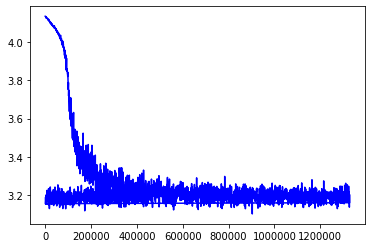

In [445]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')


In [ ]:
with torch.no_grad():
    output = network(example_data)

In [ ]:
fig = plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
